In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
# 1. Dataset Overview
# a. Structure of the dataset
print("Dataset shape:", df.shape)
print("Columns in the dataset:", df.columns)
print("Target variable classes:", df['species'].unique())

Dataset shape: (150, 5)
Columns in the dataset: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target variable classes: ['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [4]:
# 2. Data Cleaning and Preprocessing
# a. Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
# b. Check data types
print("Data types:")
print(df.dtypes)

Data types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


In [6]:
# 3. Exploratory Data Analysis (EDA)
# a. Basic summary statistics (mean, std, min, max)
print("Summary statistics:")
print(df.describe())

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


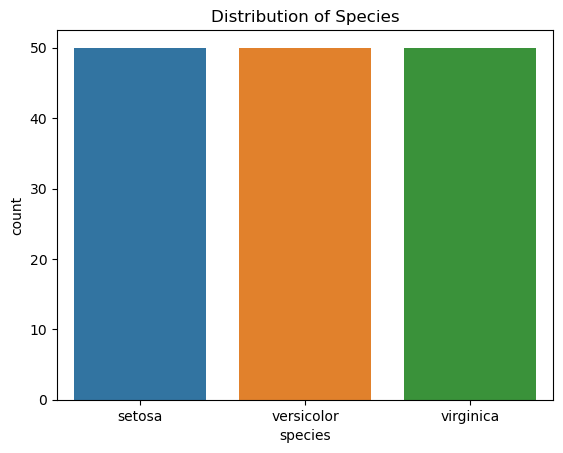

In [7]:
# b. Distribution of the target variable (species)
sns.countplot(x='species', data=df)
plt.title("Distribution of Species")
plt.show()

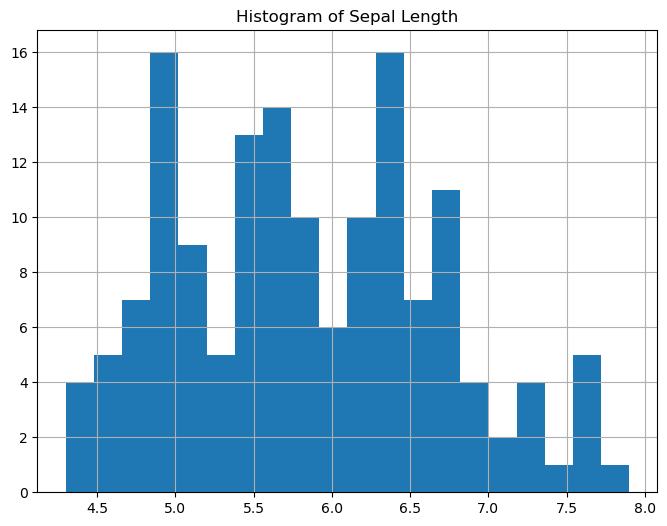

In [8]:
# c. Distribution of numerical features (histograms)
df['sepal length (cm)'].hist(bins=20, figsize=(8, 6))
plt.title("Histogram of Sepal Length")
plt.show()

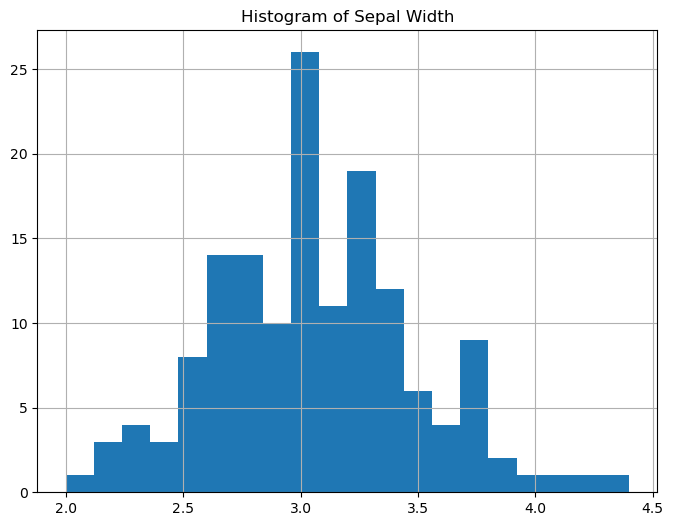

In [9]:
df['sepal width (cm)'].hist(bins=20, figsize=(8, 6))
plt.title("Histogram of Sepal Width")
plt.show()

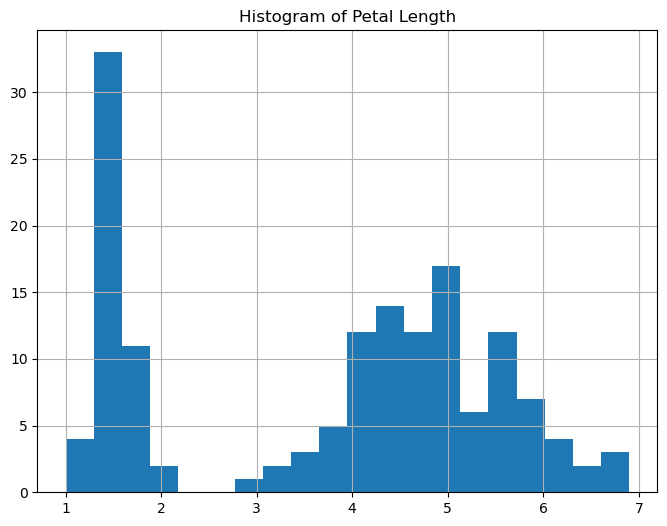

In [10]:
df['petal length (cm)'].hist(bins=20, figsize=(8, 6))
plt.title("Histogram of Petal Length")
plt.show()

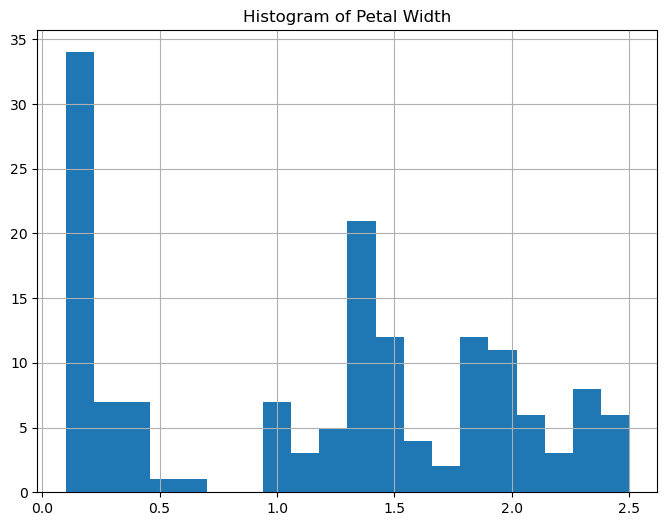

In [11]:
df['petal width (cm)'].hist(bins=20, figsize=(8, 6))
plt.title("Histogram of Petal Width")
plt.show()

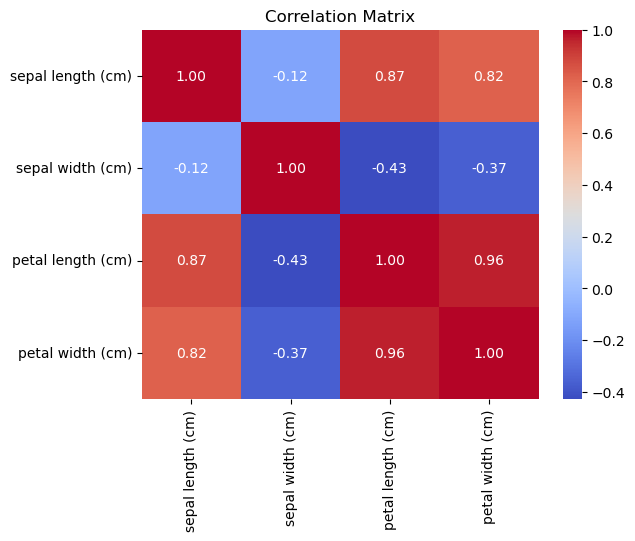

In [12]:
# d. Correlation matrix
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


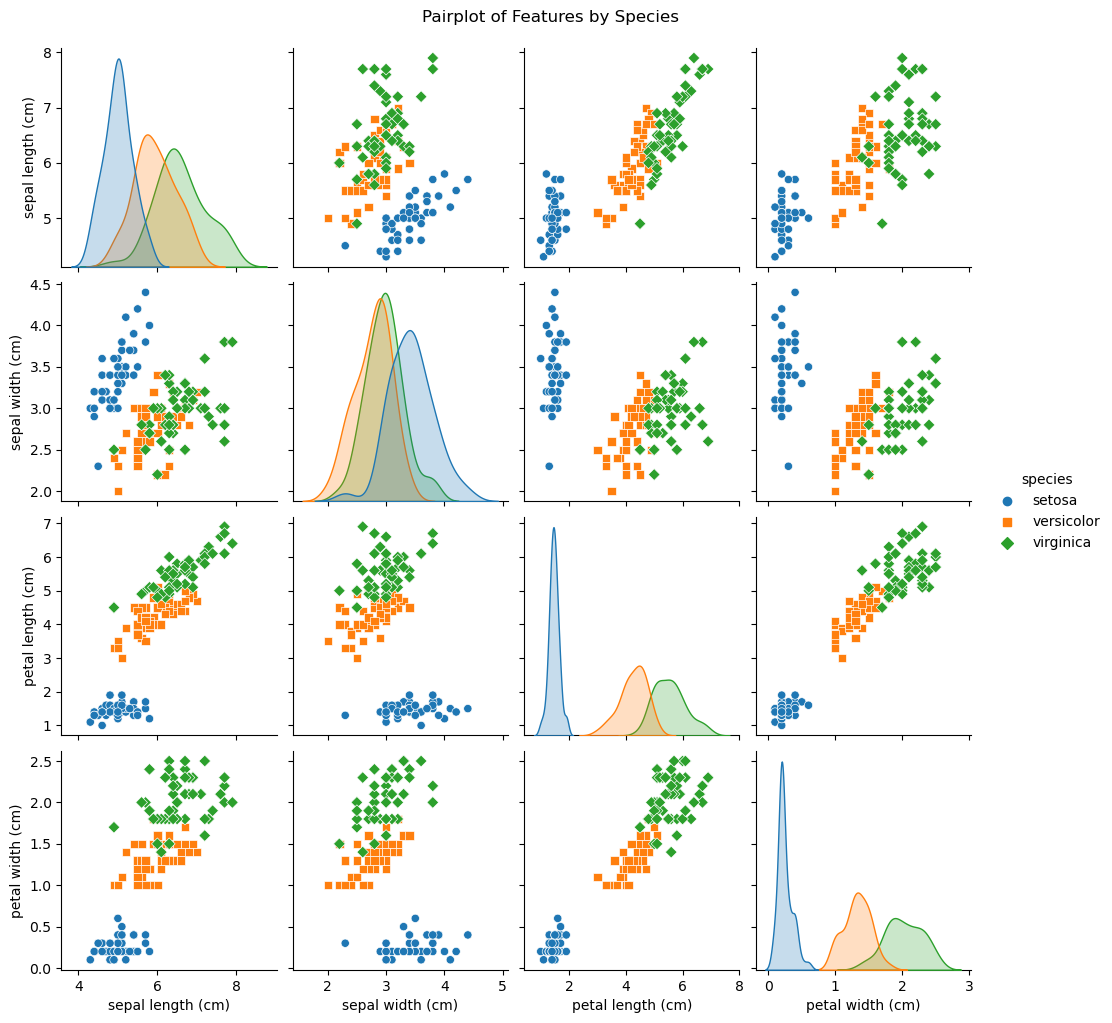

In [13]:
# 4. Visual Analysis
# a. Pairplot to visualize relationships between features and species
sns.pairplot(df, hue='species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

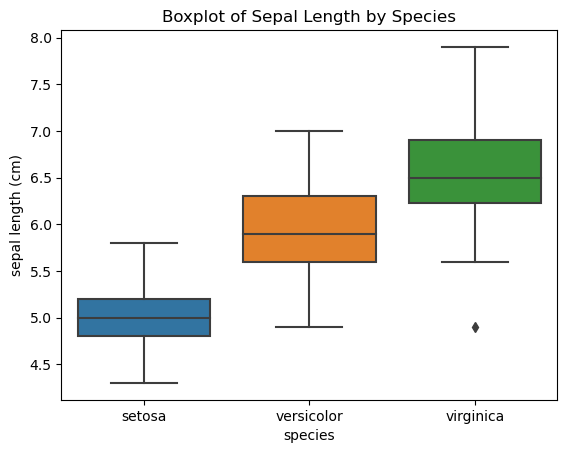

In [14]:
# b. Boxplot for each feature grouped by species
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

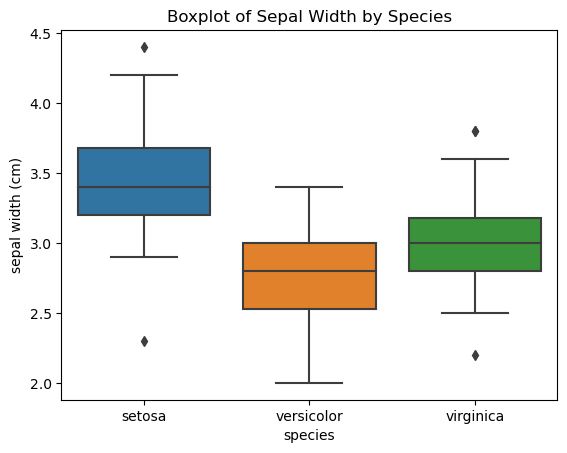

In [15]:
sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.title("Boxplot of Sepal Width by Species")
plt.show()

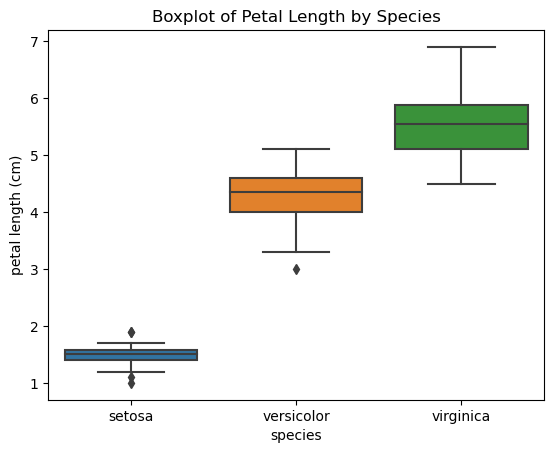

In [16]:
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title("Boxplot of Petal Length by Species")
plt.show()

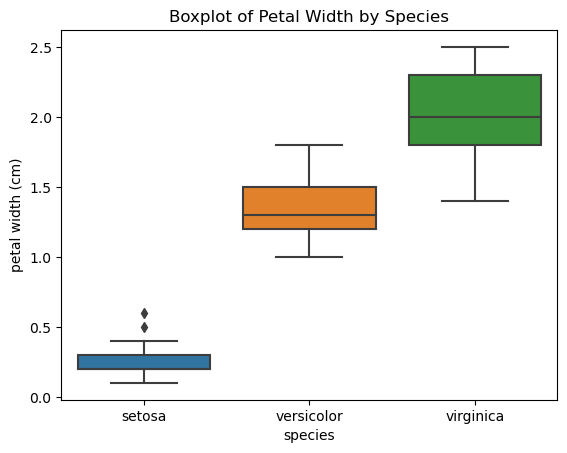

In [17]:
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()

D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


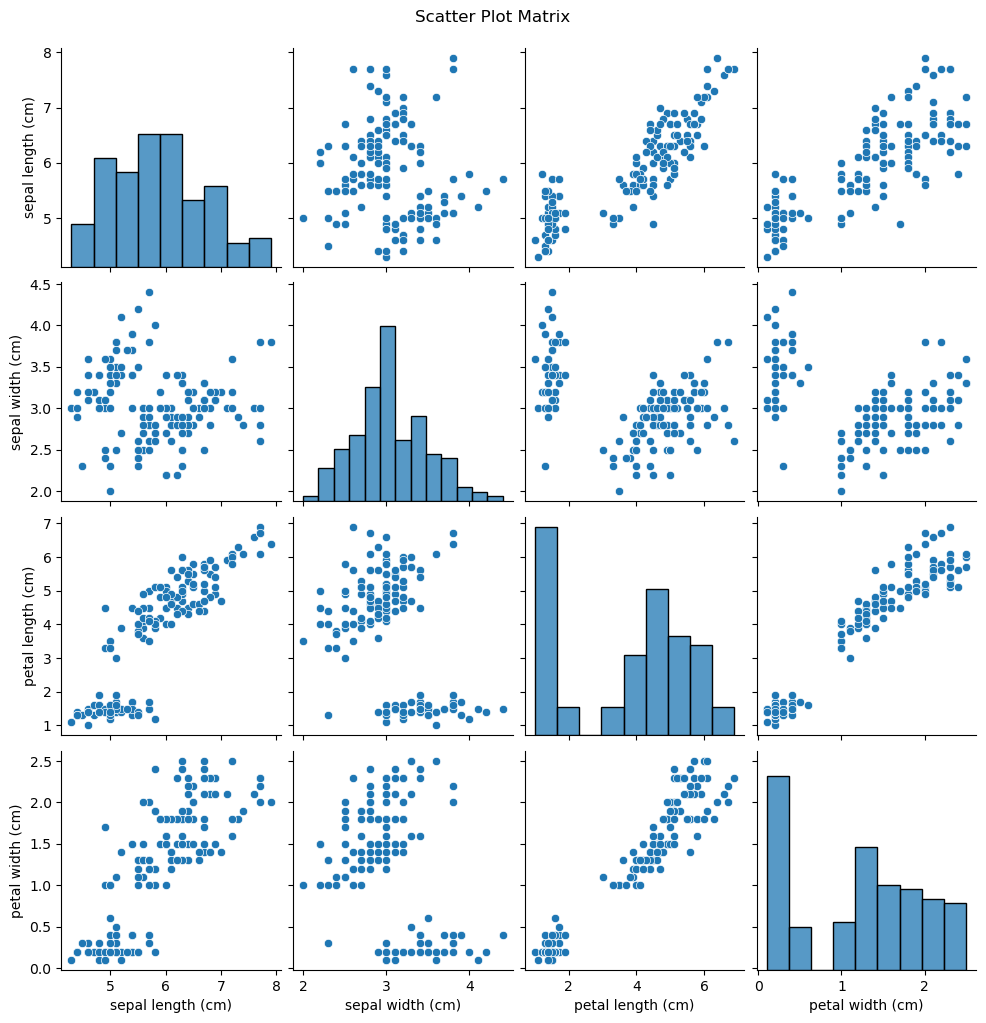

In [18]:
# c. Scatter plot matrix (pairwise relationships between features)
sns.pairplot(df.drop('species', axis=1))
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

In [19]:
# 5. Feature Analysis
# a. Range and distribution of each feature
print("Feature ranges:")
print("Sepal length range:", df['sepal length (cm)'].min(), "to", df['sepal length (cm)'].max())
print("Sepal width range:", df['sepal width (cm)'].min(), "to", df['sepal width (cm)'].max())
print("Petal length range:", df['petal length (cm)'].min(), "to", df['petal length (cm)'].max())
print("Petal width range:", df['petal width (cm)'].min(), "to", df['petal width (cm)'].max())


Feature ranges:
Sepal length range: 4.3 to 7.9
Sepal width range: 2.0 to 4.4
Petal length range: 1.0 to 6.9
Petal width range: 0.1 to 2.5


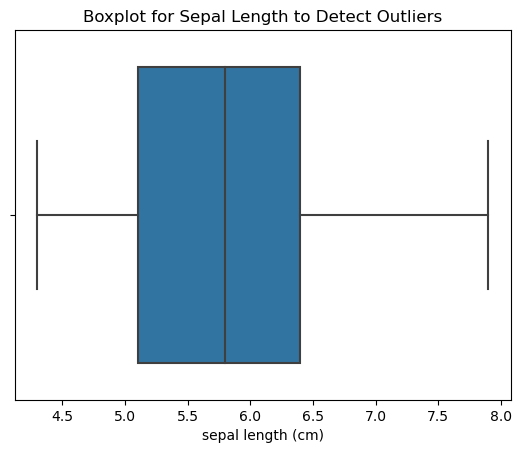

In [20]:
# b. Outliers in the numerical features (using boxplots)
sns.boxplot(x=df['sepal length (cm)'])
plt.title("Boxplot for Sepal Length to Detect Outliers")
plt.show()

In [21]:
# 6. Statistical Analysis
# a. Mean, median, mode for numerical features
print("Mean of features:")
print("Sepal length mean:", df['sepal length (cm)'].mean())
print("Sepal width mean:", df['sepal width (cm)'].mean())
print("Petal length mean:", df['petal length (cm)'].mean())
print("Petal width mean:", df['petal width (cm)'].mean())

print("Median of features:")
print("Sepal length median:", df['sepal length (cm)'].median())
print("Sepal width median:", df['sepal width (cm)'].median())
print("Petal length median:", df['petal length (cm)'].median())
print("Petal width median:", df['petal width (cm)'].median())

print("Mode of features:")
print("Sepal length mode:", df['sepal length (cm)'].mode()[0])
print("Sepal width mode:", df['sepal width (cm)'].mode()[0])
print("Petal length mode:", df['petal length (cm)'].mode()[0])
print("Petal width mode:", df['petal width (cm)'].mode()[0])

Mean of features:
Sepal length mean: 5.843333333333334
Sepal width mean: 3.0573333333333337
Petal length mean: 3.7580000000000005
Petal width mean: 1.1993333333333336
Median of features:
Sepal length median: 5.8
Sepal width median: 3.0
Petal length median: 4.35
Petal width median: 1.3
Mode of features:
Sepal length mode: 5.0
Sepal width mode: 3.0
Petal length mode: 1.4
Petal width mode: 0.2


In [22]:
# b. Variance and standard deviation by species
print("Variance by species:")
print(df.groupby('species').var())

print("Standard deviation by species:")
print(df.groupby('species').std())

Variance by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               0.124249          0.143690           0.030159   
versicolor           0.266433          0.098469           0.220816   
virginica            0.404343          0.104004           0.304588   

            petal width (cm)  
species                       
setosa              0.011106  
versicolor          0.039106  
virginica           0.075433  
Standard deviation by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               0.352490          0.379064           0.173664   
versicolor           0.516171          0.313798           0.469911   
virginica            0.635880          0.322497           0.551895   

            petal width (cm)  
species                       
setosa              0.105386 

In [23]:
# c. Hypothesis testing (T-test between species for petal length)
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df['species'] == 'versicolor']['petal length (cm)']
t_stat, p_val = stats.ttest_ind(setosa_petal_length, versicolor_petal_length)
print("T-test between Setosa and Versicolor Petal Length: T-statistic =", t_stat, ", p-value =", p_val)

T-test between Setosa and Versicolor Petal Length: T-statistic = -39.492719391538095 , p-value = 5.404910513441677e-62


In [24]:
# 7. Data Normalization
# a. Normalize features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('species', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.drop('species', axis=1).columns)
print("Normalized Features:")
print(scaled_df.head())

Normalized Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


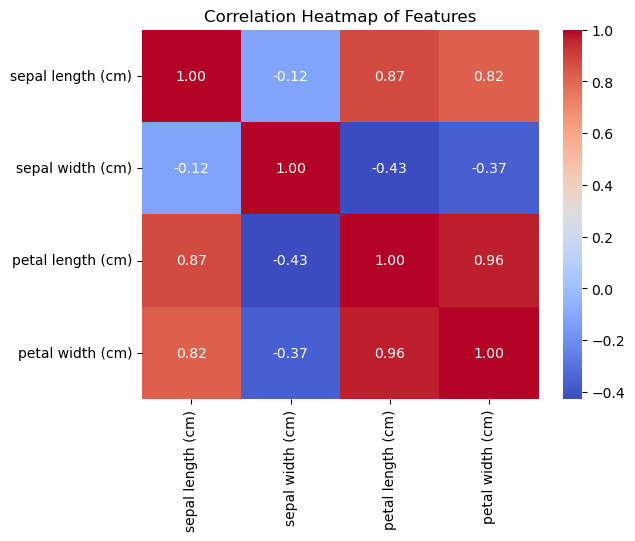

In [25]:
# Bonus (Advanced)
# a. Heatmap of the correlation matrix
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

In [26]:
# b. Handling categorical variables for machine learning models
# Categorical variable 'species' can be converted into numerical values using label encoding
df['species_encoded'] = df['species'].astype('category').cat.codes
print("Encoded Species:")
print(df[['species', 'species_encoded']].head())

Encoded Species:
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0
